In [ ]:
#Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#seaborn is a data visualization library built on matplotlib
import seaborn as sns 
#set the plotting style 
sns.set_style("whitegrid")

In [ ]:
cost = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Public University Expenditures.csv')

tuition = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Public University Tuition.csv')

In [ ]:
tuition.head()

,Year,"Total tuition, fees, room, and board"
0,1968,8115.818143
1,1969,8299.752223
2,1970,8453.404657
3,1971,8646.172477
4,1972,9190.799802


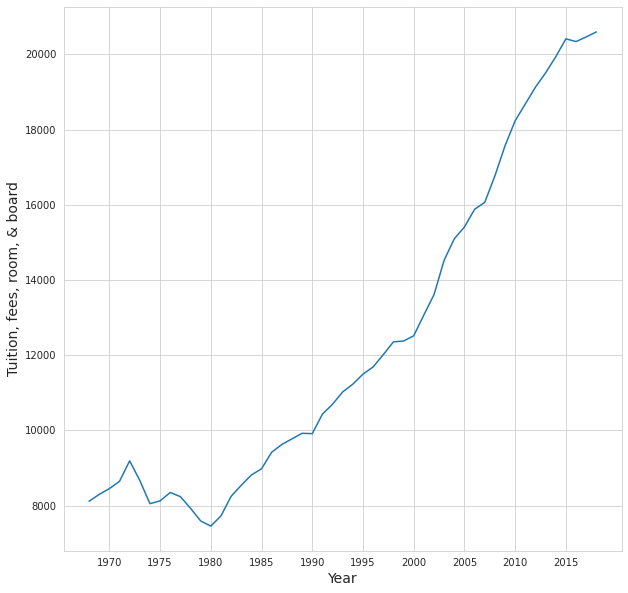

In [ ]:
plt.figure(figsize = (10,10))
sns.lineplot(data= tuition, x="Year", y="Total tuition, fees, room, and board")
plt.ylabel('Tuition, fees, room, & board',fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.xticks(np.arange(1970, 2018+1, 5.0));

We can see tuition per student increasing consistently starting in 1980.

## **Cleaning**

In [ ]:
cost

,Year,Total,Total instruction,Salaries and wages,Research,Public Service,Academic Support,Student Services,Institutional Support,Auxilary Enterprises,Net Aid Grant to students,Hospital services,Independent operations,Other
0,2010,42534.39555,12365.27665,7087.116549,5933.690673,2191.148307,3337.843705,1914.322457,3640.012653,4358.256399,1768.918543,5256.614341,216.232577,1552.079246
1,2011,42218.76076,12162.24179,6938.254204,5750.641012,2120.860086,3398.442800,1938.440336,3532.145071,4317.382798,1634.458499,5549.817262,217.793695,1596.537409
2,2012,42334.57522,12301.23620,6991.999342,5689.484392,2072.553114,3476.653669,1991.271594,3641.152796,4328.947878,1614.671784,5623.033049,217.020275,1378.550473
3,2013,43505.50404,12603.54772,7184.647679,5542.571730,2102.495353,3593.650978,2093.008087,3791.571129,4428.313292,1598.300614,5959.116793,243.811696,1549.116647
4,2014,44343.93498,12908.55763,7295.118055,5545.552308,2090.634233,3706.646036,2144.011904,3830.575125,4501.244730,1585.960708,6290.136323,252.815432,1487.800555
5,2015,46661.93077,13314.27310,7553.614477,5591.380501,2161.390339,3863.880599,2237.963544,3968.412053,4524.725117,1611.317925,6978.026015,261.554918,2149.006662
6,2016,46620.58147,13114.91216,7482.043715,5479.183446,2165.039906,3871.387729,2235.173697,3917.902430,4554.903891,1560.678323,7193.624950,251.421308,2276.353634
7,2017,47216.48974,12759.38271,7408.570547,5453.340064,2120.997213,3849.949904,2217.479353,3805.421472,4497.116804,1600.006767,7168.408346,248.432488,3495.954616
8,2018,47892.48297,12748.15718,7471.115538,5522.090050,2081.696907,3838.324455,2256.429492,3794.367884,4448.039666,1616.540280,7561.403072,234.859131,3790.574861


In [ ]:
cost1 = cost.diff(-1).apply(lambda x: x*-1)

In [ ]:
cost1

,Year,Total,Total instruction,Salaries and wages,Research,Public Service,Academic Support,Student Services,Institutional Support,Auxilary Enterprises,Net Aid Grant to students,Hospital services,Independent operations,Other
0,1.0,-315.63479,-203.03486,-148.862345,-183.049661,-70.288221,60.599095,24.117879,-107.867582,-40.873601,-134.460044,293.202921,1.561118,44.458163
1,1.0,115.81446,138.99441,53.745138,-61.156620,-48.306972,78.210869,52.831258,109.007725,11.565080,-19.786715,73.215787,-0.773420,-217.986936
2,1.0,1170.92882,302.31152,192.648337,-146.912662,29.942239,116.997309,101.736493,150.418333,99.365414,-16.371170,336.083744,26.791421,170.566174
3,1.0,838.43094,305.00991,110.470376,2.980578,-11.861120,112.995058,51.003817,39.003996,72.931438,-12.339906,331.019530,9.003737,-61.316092
4,1.0,2317.99579,405.71547,258.496422,45.828193,70.756106,157.234563,93.951640,137.836928,23.480387,25.357217,687.889692,8.739486,661.206107
5,1.0,-41.34930,-199.36094,-71.570762,-112.197055,3.649567,7.507130,-2.789847,-50.509623,30.178774,-50.639602,215.598935,-10.133610,127.346972
6,1.0,595.90827,-355.52945,-73.473168,-25.843382,-44.042693,-21.437825,-17.694344,-112.480958,-57.787087,39.328444,-25.216604,-2.988820,1219.600982
7,1.0,675.99323,-11.22553,62.544991,68.749986,-39.300306,-11.625449,38.950139,-11.053588,-49.077138,16.533513,392.994726,-13.573357,294.620245
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cost1.describe()

,Year,Total,Total instruction,Salaries and wages,Research,Public Service,Academic Support,Student Services,Institutional Support,Auxilary Enterprises,Net Aid Grant to students,Hospital services,Independent operations,Other
count,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1.0,669.760927,47.860066,47.999874,-51.450078,-13.681425,62.560094,42.763379,19.294404,11.222908,-19.047283,288.098591,2.328319,279.811952
std,0.0,826.812227,282.215278,139.993202,90.825959,46.778794,65.801777,42.019998,106.241828,57.568907,54.793581,215.341652,12.709681,460.376849
min,1.0,-315.634790,-355.529450,-148.862345,-183.049661,-70.288221,-21.437825,-17.694344,-112.480958,-57.787087,-134.460044,-25.216604,-13.573357,-217.986936
25%,1.0,76.523520,-200.279420,-72.046363,-120.875957,-45.108763,2.723985,17.390947,-64.849113,-42.924485,-27.499937,180.003148,-4.775017,18.014599
50%,1.0,635.950750,63.884440,58.145064,-43.500001,-25.580713,69.404982,44.976978,13.975204,17.522734,-14.355538,312.111225,0.393849,148.956573
75%,1.0,921.555410,302.986118,131.014866,13.692482,10.222735,113.995621,63.111354,116.215026,40.866940,18.739439,350.311489,8.805548,386.266711
max,1.0,2317.995790,405.715470,258.496422,68.749986,70.756106,157.234563,101.736493,150.418333,99.365414,39.328444,687.889692,26.791421,1219.600982


In [ ]:
cost1 = cost1.dropna()

In [ ]:
cost1

,Year,Total,Total instruction,Salaries and wages,Research,Public Service,Academic Support,Student Services,Institutional Support,Auxilary Enterprises,Net Aid Grant to students,Hospital services,Independent operations,Other
0,1.0,-315.63479,-203.03486,-148.862345,-183.049661,-70.288221,60.599095,24.117879,-107.867582,-40.873601,-134.460044,293.202921,1.561118,44.458163
1,1.0,115.81446,138.99441,53.745138,-61.156620,-48.306972,78.210869,52.831258,109.007725,11.565080,-19.786715,73.215787,-0.773420,-217.986936
2,1.0,1170.92882,302.31152,192.648337,-146.912662,29.942239,116.997309,101.736493,150.418333,99.365414,-16.371170,336.083744,26.791421,170.566174
3,1.0,838.43094,305.00991,110.470376,2.980578,-11.861120,112.995058,51.003817,39.003996,72.931438,-12.339906,331.019530,9.003737,-61.316092
4,1.0,2317.99579,405.71547,258.496422,45.828193,70.756106,157.234563,93.951640,137.836928,23.480387,25.357217,687.889692,8.739486,661.206107
5,1.0,-41.34930,-199.36094,-71.570762,-112.197055,3.649567,7.507130,-2.789847,-50.509623,30.178774,-50.639602,215.598935,-10.133610,127.346972
6,1.0,595.90827,-355.52945,-73.473168,-25.843382,-44.042693,-21.437825,-17.694344,-112.480958,-57.787087,39.328444,-25.216604,-2.988820,1219.600982
7,1.0,675.99323,-11.22553,62.544991,68.749986,-39.300306,-11.625449,38.950139,-11.053588,-49.077138,16.533513,392.994726,-13.573357,294.620245


In [ ]:
cost1.columns

Index(['Year', 'Total', 'Total instruction', 'Salaries and wages', 'Research',
       'Public Service', 'Academic Support', 'Student Services',
       'Institutional Support', 'Auxilary Enterprises',
       'Net Aid Grant to students', 'Hospital services',
       'Independent operations', 'Other'],
      dtype='object')

# **Statistical Tests**

In [ ]:
import scipy.stats 
from scipy import stats

**Hypothesis test for difference in means:**

Let A = Cost per student for the Other Category

Let B = Cost per student for the Research Category

$H_0: \mu_A - \mu_B = 0$

$H_A: \mu_A - \mu_B \ne 0$

In [ ]:
#get t statistic cannot use this p-value because we want one-sided test
a = cost1['Other'].to_numpy()
b = cost1['Research'].to_numpy()
stats.ttest_ind(a=a, b=b, equal_var= True)

Ttest_indResult(statistic=1.9966950647089605, pvalue=0.06568238028828763)

In [ ]:
#get critical t statistic for one-sided test
df = len(a) + len(b) -2
t = scipy.stats.t.ppf(.95, df)
1-scipy.stats.t.cdf(1.996695064708905,df)

0.032841190144147214

With a p-value of .0328, we reject the null hypothesis. We have enough evidence to conclude the average yearly change in costs per student in the Other category are greater than the average yearly change in costs per student in the Research category. 

**Hypothesis test for difference in means:**

Let A = Cost per student for the Hospital Services Category

Let B = Cost per student for the Academic Support Category

$H_0: \mu_A - \mu_B = 0$

$H_A: \mu_A - \mu_B \ne 0$

In [ ]:
#get t statistic cannot use this p-value because we want one-sided test
a = cost1['Hospital services'].to_numpy()
b = cost1['Academic Support'].to_numpy()
stats.ttest_ind(a=a, b=b, equal_var= True)

Ttest_indResult(statistic=2.8330455326844675, pvalue=0.01328675296174631)

In [ ]:
#get critical t statistic for one-sided test
df = len(a) + len(b) -2
t = scipy.stats.t.ppf(.95, df)
1-scipy.stats.t.cdf(2.8330455326844675,df)

0.006643376480873098

With a p-value of .0066, we reject the null hypothesis. We have enough evidence to conclude the average yearly change in costs per student in the Hospital Services category are greater than the average yearly change in costs per student in the Academic Support category. 

## **Data Visualization**

In [ ]:
from google.colab import files

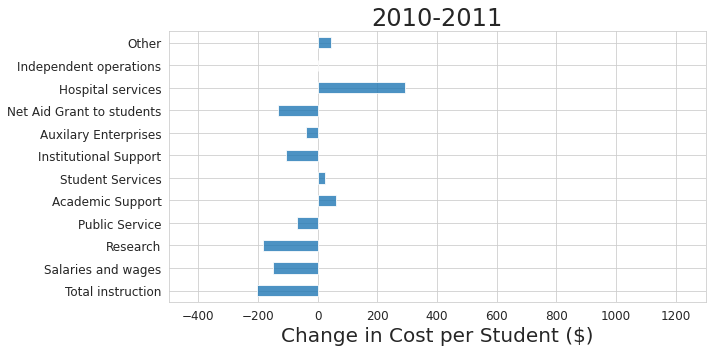

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

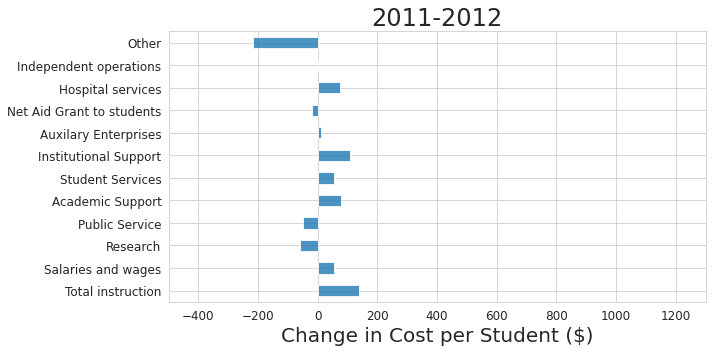

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

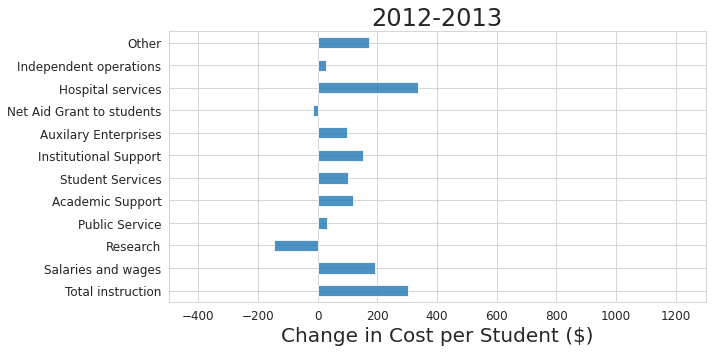

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

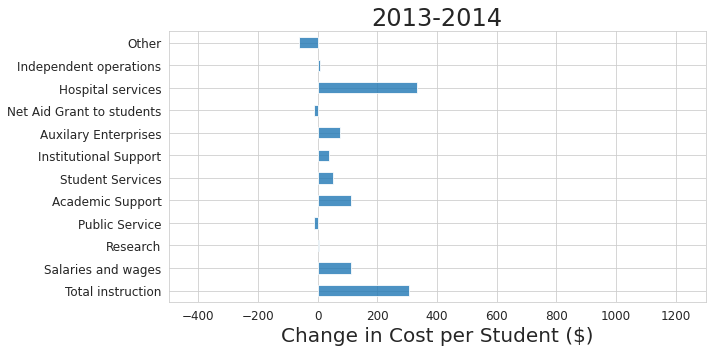

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

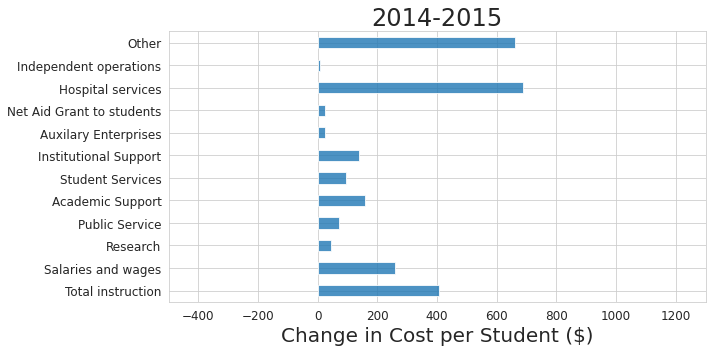

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

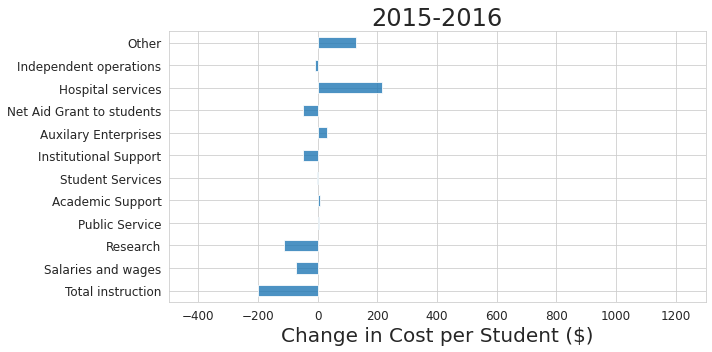

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

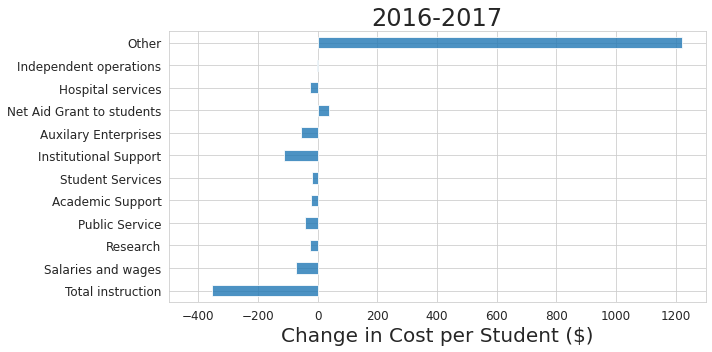

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

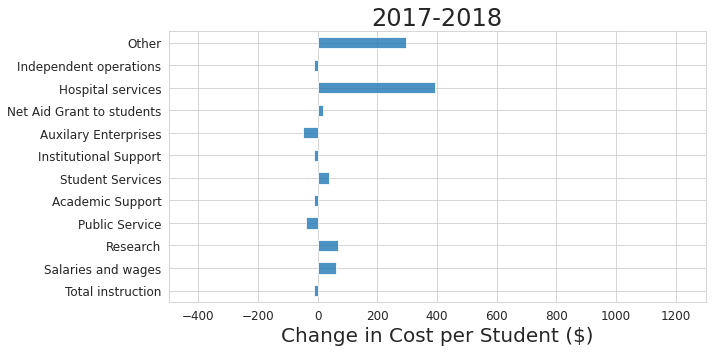

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
 #Visualize change in cost per student for each category over time
 labels = ['2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017','2017-2018']

 for i in range(len(cost1)): 
  f = plt.figure()
  cost1.drop(columns = ['Year','Total']).iloc[i].plot.barh(fontsize = 'large', figsize =(10,5), stacked = True, alpha = .8)
  plt.xlim(-500, 1300)
  plt.title(label = labels[i], fontsize = 24)
  plt.xlabel('Change in Cost per Student ($)', fontsize = 20)
  plt.tight_layout(pad = 1.08)
  plt.show()
  
  #uncomment to download images for gif
  #f.savefig('cost1breakdown'+ str(i)+'.jpg')
  #files.download('cost1breakdown'+ str(i)+'.jpg')

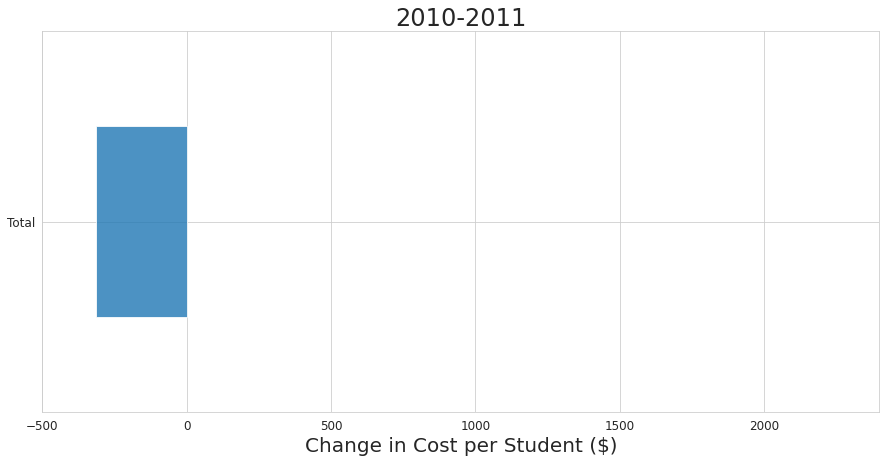

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

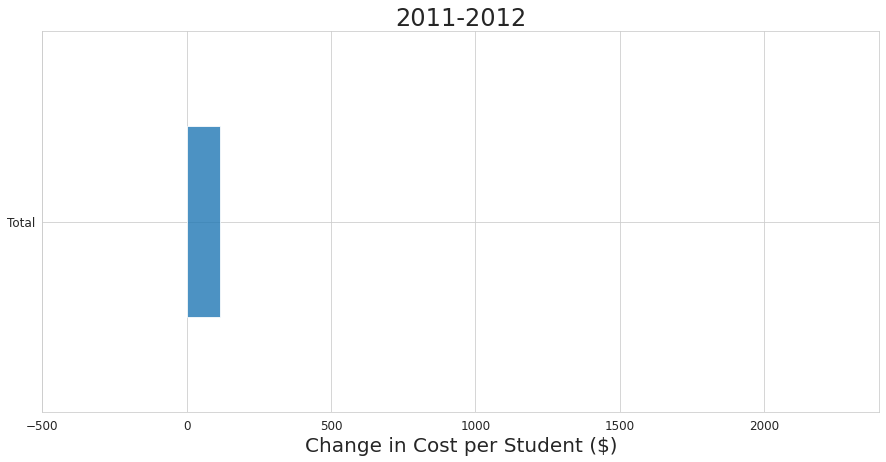

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

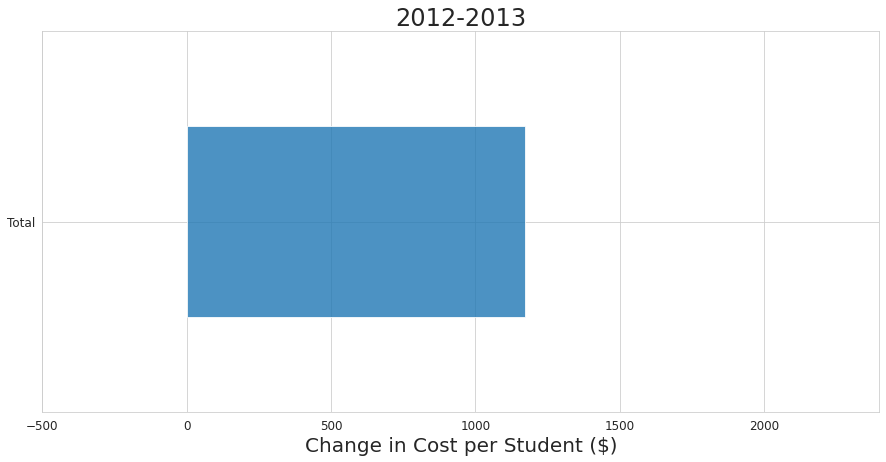

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

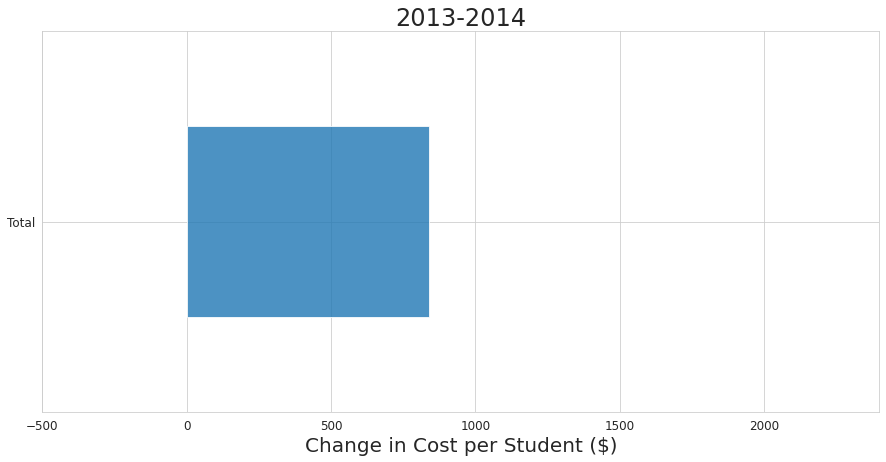

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

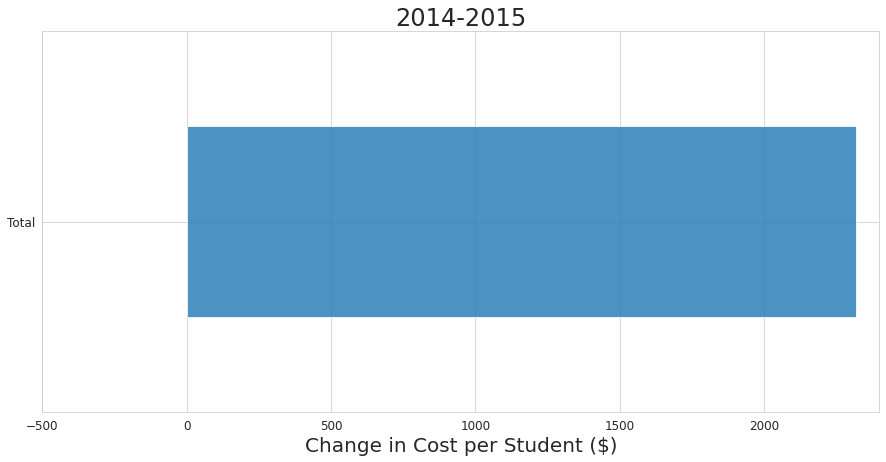

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

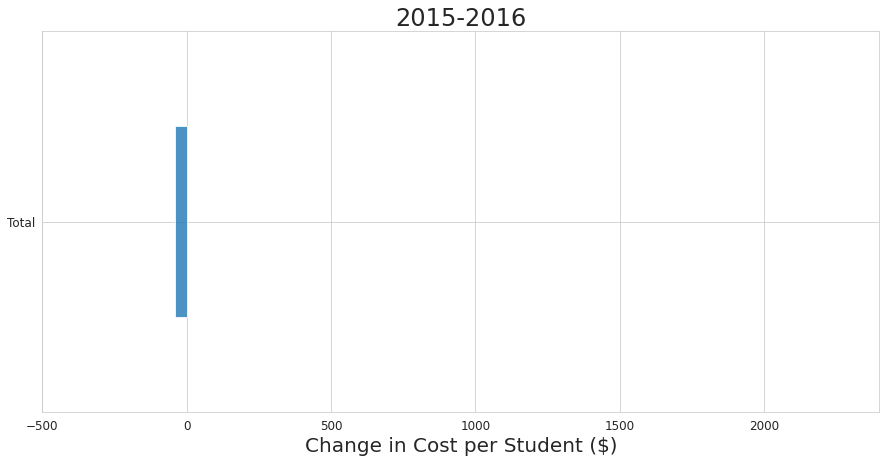

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

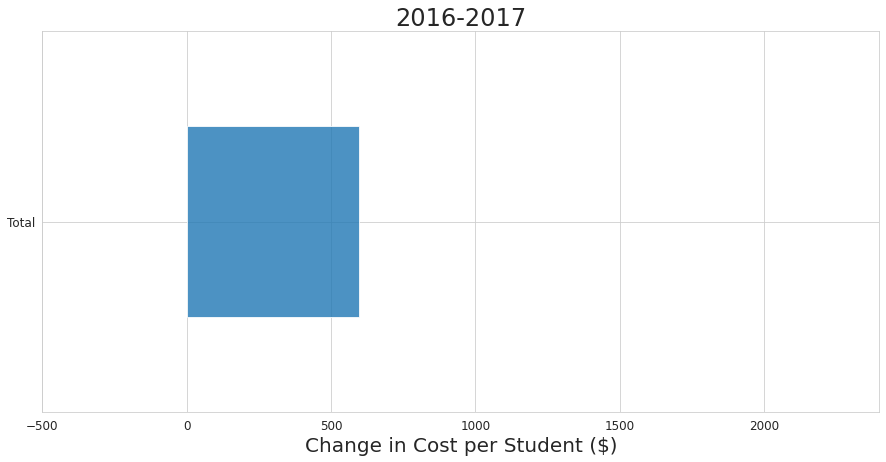

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

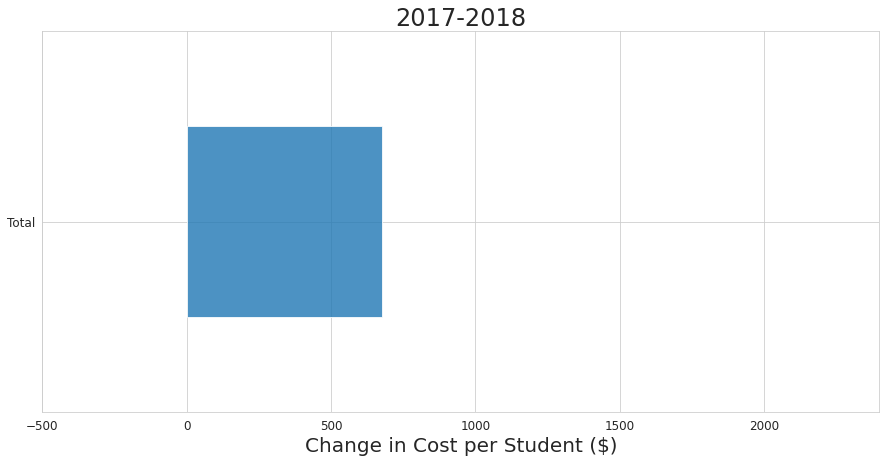

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
 #Visualize change in total cost per student over the years

labels = ['2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017','2017-2018']

for i in range(len(cost1)): 
  f = plt.figure()
  cost1.drop(columns = ['Year', 'Total instruction', 'Salaries and wages', 'Research',
       'Public Service', 'Academic Support', 'Student Services',
       'Institutional Support', 'Auxilary Enterprises',
       'Net Aid Grant to students', 'Hospital services',
       'Independent operations', 'Other']).iloc[i].plot.barh(fontsize = 'large', figsize =(15,7), stacked = True, alpha = .8)
  plt.xlim(-500, 2400)
  plt.title(label = labels[i], fontsize = 24)
  plt.xlabel('Change in Cost per Student ($)', fontsize = 20)
  plt.show()
  
  #uncomment to download images for gif
  #f.savefig('totalcost'+ str(i)+'.jpg')
  #files.download('totalcost'+ str(i)+'.jpg')